# Lineær regresjon med python

Vi ønsker å simulere en lineær tilpasning i python. Vi vil danne en lineær (affin) funksjon, trekke tilfeldige verdier for denne, legge til normalfordelt støy, og til slutt tilpasse en ny lineær funksjon til disse tallene.

## a) Trekke tilfeldige verdier

In [12]:
# Først importerer vi pakkene vi vil bruke
import numpy as np
import matplotlib.pyplot as plt

### i) 
"Lag deg en affin funksjon (f.ks $f(x) = 2x + 3$))..."

In [13]:
# Her velger vi funksjonen 3x + 5
def f(x):
    return 3*x + 5

### ii)
"...trekk 10 tilfeldige tall..."

In [14]:
randomNumbers = []

# Vi looper 10 ganger
for i in range(0,10,1):
    # Trekker et tilfeldig tall mellom 0 og 1,
    # og ganger med 5 slik at vi får et tilfeldig
    # tall mellom 0 og 5
    randomNumbers.append(np.random.random() * 5)

print(randomNumbers)

[2.64406008010579, 4.829968207872993, 3.598705904922883, 1.7416971991296788, 1.2564846272462515, 3.214486497091319, 0.30063810167459293, 1.6821705500300577, 4.698305780801247, 0.33124233849452234]


### iii)
"... beregn $f(x) + \epsilon$ der du setter inn et tilfeldig normalfordelt tall som $\epsilon$ med ``np.random.normal``."

In [15]:
randomNoise = []

for i in range(0,10,1):
    # Trekker normalfordelt støy
    randomNoise.append(np.random.normal())

print(randomNoise)

[-1.080693851302511, 1.9308353870180757, -1.007342628456885, -0.5859746298183314, 0.7731354756026001, 1.049045210057495, 1.582186082038662, -0.3405335501156207, -0.4148811928602074, -0.9552497943372923]


In [16]:
randomValues = []

for i in range(0,10,1):
    # Beregner en funksjonsverdi og legger til støy
    currentRandomValue = f(randomNumbers[i]) + randomNoise[i]    
    randomValues.append(currentRandomValue)

print(randomValues)

[11.851486389014859, 21.42074001063705, 14.788775086311764, 9.639116967570706, 9.542589357341356, 15.692504701331453, 7.4841003870624405, 9.705978099974551, 18.680036149543533, 5.038477221146275]


### iv)
"Verifiser med ett plott at ting fungerer som det skal"

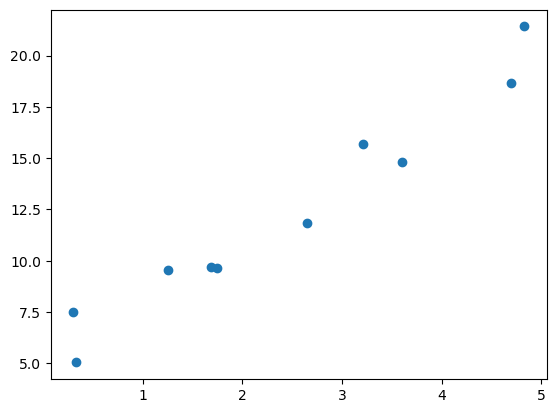

In [17]:
# Vi har tallene vi la inn i funksjonen, og tallene vi fikk ut.
# Plottingen er da ganske rett frem:

plt.plot(randomNumbers,randomValues,"o")
plt.show()

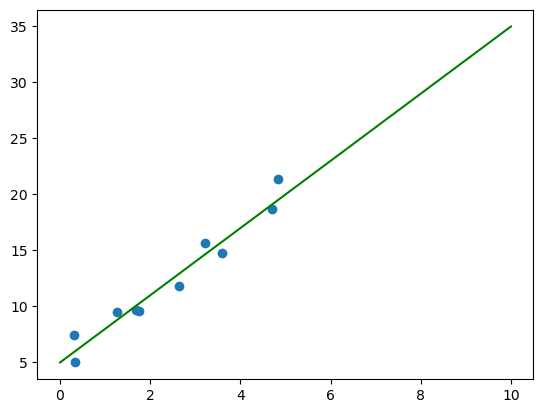

In [18]:
# Plotter de tilfeldige funksjonsverdiene
plt.plot(randomNumbers,randomValues,"o")

# Bruker skumle numpy funskjoner for å plotte grafen
X = np.linspace(0,10,100)
Y = f(X)
plt.plot(X,Y,color = "green")

plt.show()

## b)
### i)
"Gjør en lineærtilpasning med ``np.polyfit``."

In [19]:
# Vi har de tilfeldige tallene randomNumbers, og de korresponderende
# tilfeldige funksjonsverdiene (med støy) randomValues

# np.polyfit tar inn x-verdier, y-verdier, og polynomgrad
# for våre hensikter vil polynomgraden alltid være 1, så ikke tenk på den :)

# np.polyfit returnerer to tall, beta1 og beta0 (du må ikke bruke de variabelnavnene)
# Dette er en tilpasning til de to konstantene i funksjonen vår (i vårt tilfelle 3 og 5)
beta1, beta0 = np.polyfit(randomNumbers,randomValues,1)

# Printer de ekte verdiene (som vi bestemte)
print(3,5)
# Printer verdiene fra tilpasningen
print(beta1,beta0)

3 5
3.0615253213789964 4.945559905888112


In [ ]:
# Ganske nærme!

## ii)
"Plott lineærtilpasningen sammen med de litt spredte punktene dine"

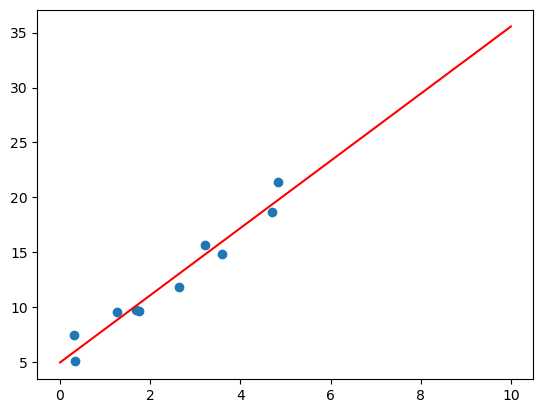

In [20]:
# Først danner vi en funksjon med beta1 og beta0
def f_tilpasset(x):
    return beta1*x + beta0

# Så gjør vi det samme som når vi plottet punktene med den ekte funksjonen:

plt.plot(randomNumbers,randomValues,"o") # "... de litt spredte punktene..."

X = np.linspace(0,10,100)
Y = f_tilpasset(X)        # Merk at vi nå har f_tilpasset()
plt.plot(X,Y,color = "red")

plt.show()

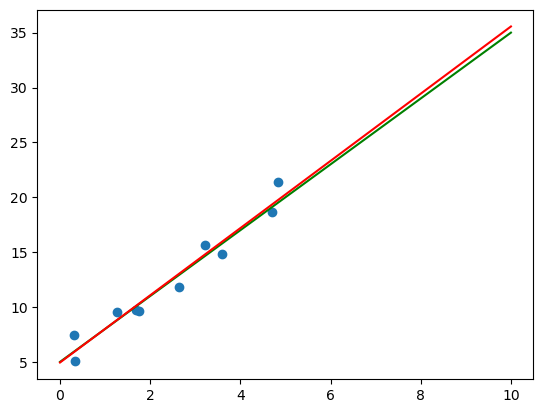

In [21]:
# Ganske bra!!!!!
# Vi kan også plotte sammen med den sanne funksjonen for å få en ide om hvor bra tilnærmingen faktisk er

plt.plot(randomNumbers,randomValues,"o") # "... de litt spredte punktene..."

X = np.linspace(0,10,100)

Y = f(X)
plt.plot(X,Y,color = "green") 
Y = f_tilpasset(X)        
plt.plot(X,Y,color = "red")

plt.show()

## c)
"Gjenta mange ganger (f. eks 10000 i en for-løkke), og lagre stigningstallet som estimeres for hver enkelt linje. Plott et histogram over stigningstallene, med ``plt.hist``."

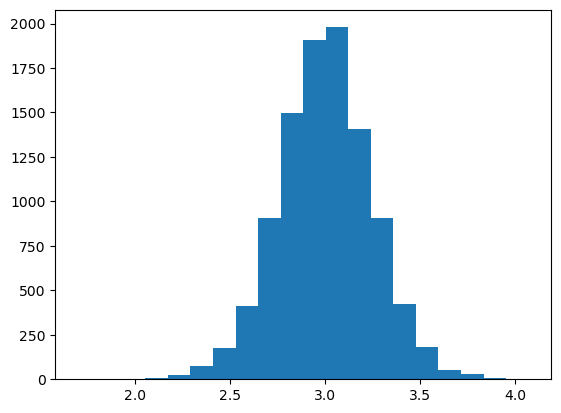

In [22]:
# Denne blir litt lang, så hold fast :)

# Vi lager en tom liste vi skal putte stigningstall i 
stigningstall = []

# Alle prosessene som gjøres i denne løkka er gjort før, og er derfor ikke
# veldig bra kommentert. Alt skal være likt som tidligere :)

# Vi looper 10000 ganger
for j in range(0,10000,1):

    # Genererer tilfeldige tall
    randomNumbers = []
    for i in range(0,10,1):
        randomNumbers.append(np.random.random() * 5)

    # Genererer tilfeldig støy
    randomNoise = []
    for i in range(0,10,1):
        randomNoise.append(np.random.normal())

    # Finner funksjonsverdier med støy
    randomValues = []
    for i in range(0,10,1):
        randomValues.append(f(randomNumbers[i]) + randomNoise[i])

    # Tilpasser funksjonskonstanter:
    beta1, beta0 = np.polyfit(randomNumbers,randomValues,1)

    # Legger til stigningstallet i lista
    stigningstall.append(beta1)

# Vi plotter et histogram over alle beta1 vi fant:
plt.hist(stigningstall,bins = 20)
plt.show()

In [23]:
# Dette er en normalfordeling!!!